Jamison Hunter

July 13, 2023

# Hypothesis Testing With Insurance Data

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

# Load & Inspect Data

In [3]:
# gathering data from local machine
path = r"C:\Users\Jamison\Desktop\CODINGDOJO\data\insurance - insurance.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

In [4]:
smoker = df["smoker"] == "yes"
nonsmoker = df["smoker"] == "no"

sa = df[smoker].value_counts().sum()
nsa = df[nonsmoker].value_counts().sum()

print(f"The number of smokers is {sa}")
print(f"The number of non-smokers is {nsa}")

The number of smokers is 274
The number of non-smokers is 1064


In [5]:
mean_smoker = df[smoker]["charges"].mean()
mean_nonsmoker = df[nonsmoker]["charges"].mean()

print(f"Charges for smokers on average are {mean_smoker}")
print(f"Charges for non-smokers on average are {mean_nonsmoker}")

Charges for smokers on average are 32050.23183153284
Charges for non-smokers on average are 8434.268297856204


In [6]:
df[smoker]["sex"].value_counts()

male      159
female    115
Name: sex, dtype: int64

According to the above data, males are more likely to be smokers than females. I will be checking with proper tests in order to confirm this.

In [7]:
for i in df["region"].unique():
    x = df["region"] == i
    mean = df[x]["charges"].mean()
    print(f"The mean insurance charges for {i} region is {mean}")

The mean insurance charges for southwest region is 12346.937377292308
The mean insurance charges for southeast region is 14735.411437609888
The mean insurance charges for northwest region is 12417.57537396923
The mean insurance charges for northeast region is 13406.384516385804


# Do Smokers Have Higher Insurance Charges Than Non-smokers?    

Null Hypothesis: Smokers and non-smokers have no substantial differences in insurance charges.

Alternative Hypothesis: There is a significant difference with regard to insurance charges between smokers and non-smokers.

In [8]:
# creating data frames for smokers and nonsmokers
smokers = df.loc[ df['smoker'] == 'yes'].copy()
nonsmokers = df.loc[ df['smoker'] == 'no'].copy()

In [9]:
# ensuring the data used is for smoker insurance charges
data_s = smokers["charges"]

The mean insurance charge is roughly $32050
The median insurance charge is roughly $34456


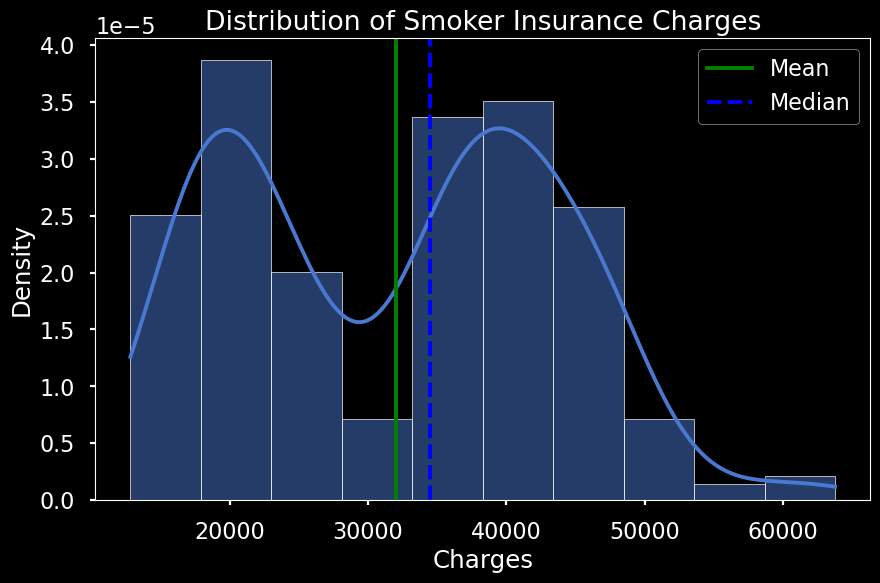

In [10]:
mean = data_s.mean()
median = data_s.median()
std = np.std(data_s)
min = np.min(data_s)
max = np.max(data_s)

fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data_s, stat='density',kde=True)
ax.set_title('Distribution of Smoker Insurance Charges')
ax.axvline(mean, color = "green", label = "Mean");
ax.axvline(median, ls='--', color = "blue", label = "Median");
ax.set_xlabel("Charges")
ax.legend()

print(f"The mean insurance charge is roughly ${round(mean)}")
print(f"The median insurance charge is roughly ${round(median)}")

In [11]:
# ensuring the data used is for smoker insurance charges
data_n = nonsmokers["charges"]

The mean insurance charge is roughly $8434
The median insurance charge is roughly $7345


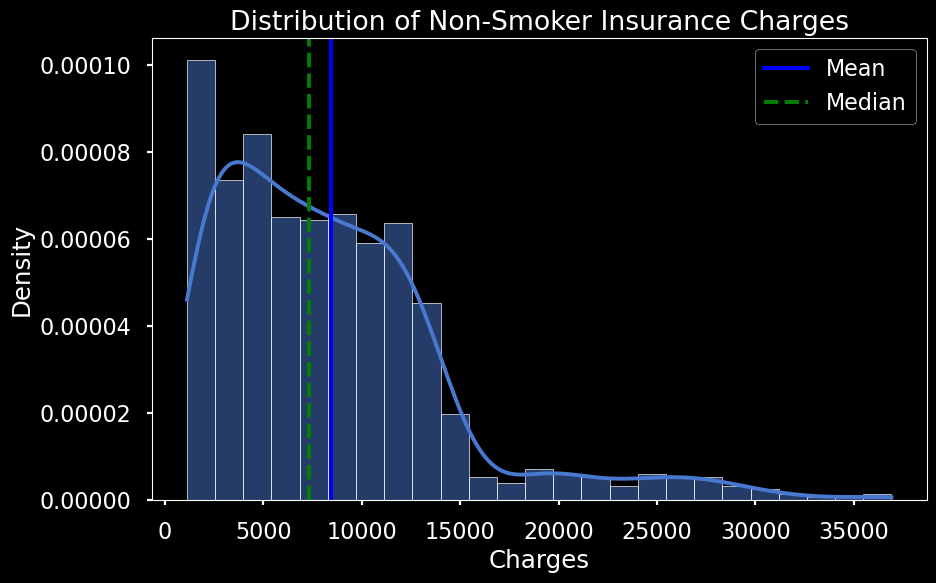

In [12]:
mean = data_n.mean()
median = data_n.median()
std = np.std(data_n)
min = np.min(data_n)
max = np.max(data_n)

fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data_n, stat='density',kde=True)
ax.set_title('Distribution of Non-Smoker Insurance Charges')
ax.axvline(mean, color = "blue", label = "Mean");
ax.axvline(median, ls='--', color = "green", label = "Median");
ax.set_xlabel("Charges")
ax.legend()

print(f"The mean insurance charge is roughly ${round(mean)}")
print(f"The median insurance charge is roughly ${round(median)}")

For this statistical analysis, I will use the 2 Sample T-test. I will be making the following assumptions performing this test.
* Normality
* Equal Variance
* No Significant Outliers

# Outliers

In [13]:
zscores = stats.zscore(smokers["charges"])
outliers = abs(zscores)>3
np.sum(outliers)

0

In [14]:
zscores = stats.zscore(nonsmokers["charges"])
outliers = abs(zscores)>3
np.sum(outliers)

24

In [15]:
# removing outliers from nonsmoker group
non = nonsmokers["charges"][(np.abs(stats.zscore(nonsmokers["charges"])) < 3)]

# Variance

In [16]:
# checking variance
stats.levene(smokers["charges"], non)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Since our P-value is far smaller than our alpha value, we know that these two statistical groups do have roughly equal variance.

# T-test

In [44]:
# performing 2 sample t-test with random sampling in a group of 50
result = stats.ttest_ind(smokers["charges"].sample(n = 50, random_state = 42), nonsmokers["charges"].sample(n = 50, random_state = 42))
result

Ttest_indResult(statistic=14.43716896990891, pvalue=5.328459143684158e-26)

Given the result of the 2 Sample T-test yielding a P-value less than alpha by a significant margin and other observable information, we reject the null hypothesis.

# Are Men More Likely To Smoke Than Women?

Null Hypothesis: Men are no more likely to smoke than women.

Alternative Hypothesis: Men are significantly more likely to smoke than women.

In [18]:
# creating data frames for males and females who smoke
male = df.loc[ df['sex'] == 'male'].copy()
female = df.loc[ df['sex'] == 'female'].copy()

Text(0.5, 0, 'Number of Males')

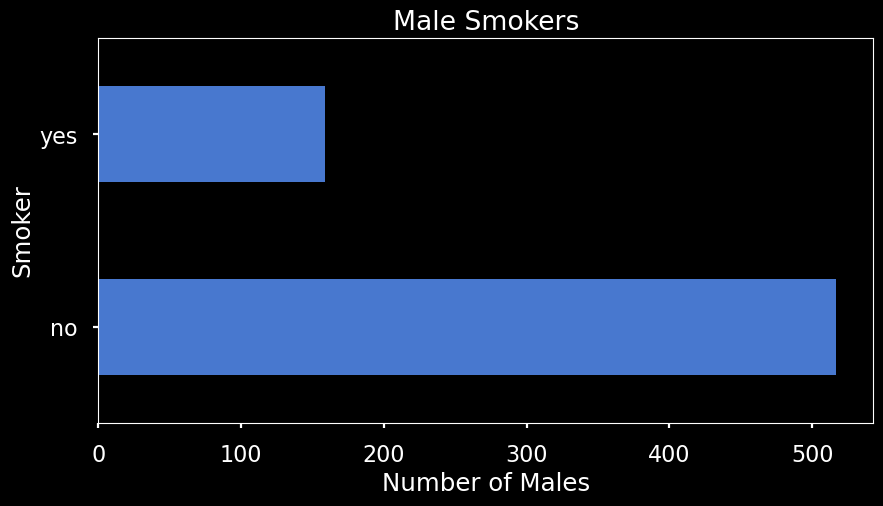

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax = male["smoker"].value_counts().plot(kind = "barh")
ax.set_title("Male Smokers")
ax.set_ylabel("Smoker")
ax.set_xlabel("Number of Males")

Text(0.5, 0, 'Number of Females')

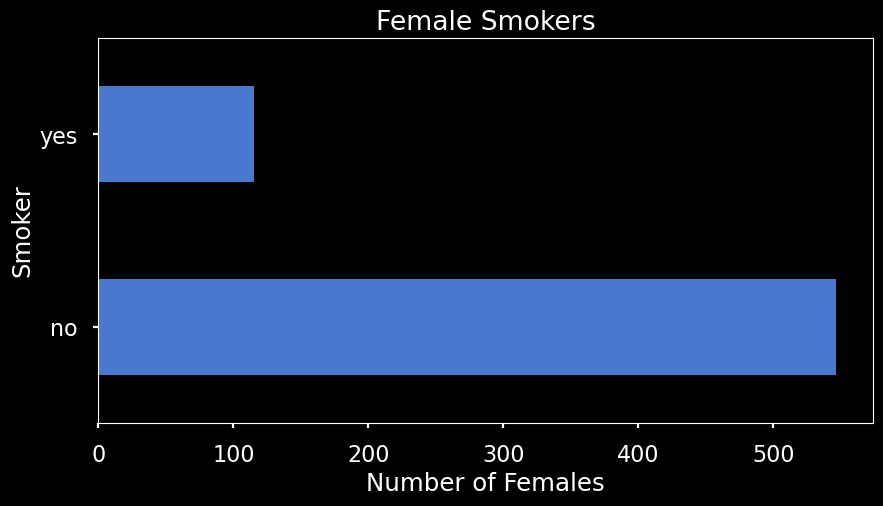

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax = female["smoker"].value_counts().plot(kind = "barh")
ax.set_title("Female Smokers")
ax.set_ylabel("Smoker")
ax.set_xlabel("Number of Females")

Given that the data we are working with here is purely catagorical, I will be using the Chi-square test as my hypothesis test. I will make the following assumptions.
* Both variables are nominal.
* Both variables are categorical and independant.

# T-test

In [21]:
# calculating the contingency table with pd.cross-tab
table = pd.crosstab(df["smoker"], df["sex"])
table

sex,female,male
smoker,,
no,547,517
yes,115,159


In [22]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [23]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Since the P-value is far less than our alpha value of 0.05, we reject the null hypothesis.

# Do Different Regions Have Different Charges On Average?

Null Hypothesis: Different regions do not have different charges on average. 
    
Alternative Hypothesis: Different regions do have significantly different charges on average.

In [24]:
# creating data frames for charges by region
southeast = df.loc[ df['region'] == 'southeast'].copy()
southwest = df.loc[ df['region'] == 'southwest'].copy()
northeast = df.loc[ df['region'] == 'northeast'].copy()
northwest = df.loc[ df['region'] == 'northwest'].copy()

Text(0.5, 0, 'Region')

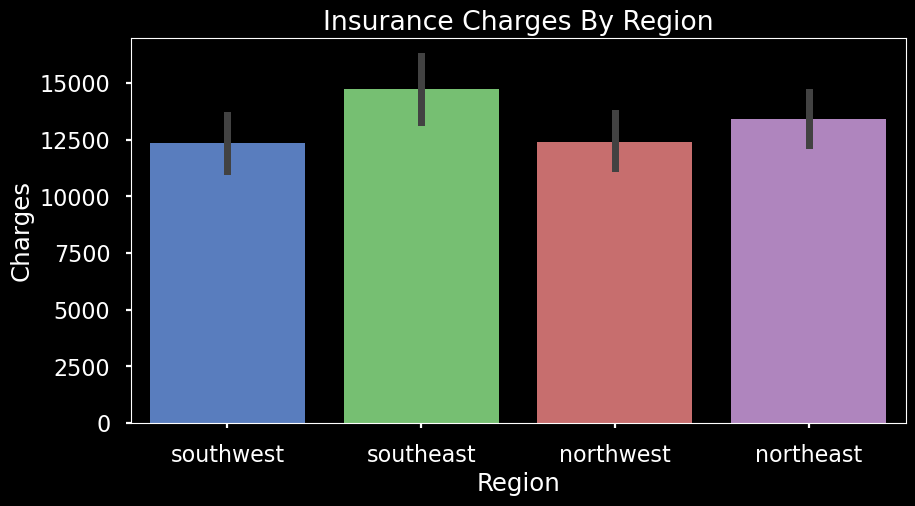

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x="region", y="charges", data = df)
ax.set_title("Insurance Charges By Region")
ax.set_ylabel("Charges")
ax.set_xlabel("Region")

Since there are more than 2 statistical groups, I will be using the Kruskal-Wallis T-test as my hypothesis test. I will make the following assumptions.
* Normality 
* Unqual Variance
* No Significant Outliers

# Outliers

In [31]:
# checking for outliers
zscores = stats.zscore(southeast["charges"])
outliers = abs(zscores)>3
np.sum(outliers)

2

In [27]:
southeast_no = southeast["charges"][(np.abs(stats.zscore(southeast["charges"])) < 3)]

In [30]:
# checking if outliers were removed
zscores = stats.zscore(southeast_no)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [32]:
# checking for outliers
zscores = stats.zscore(southwest["charges"])
outliers = abs(zscores)>3
np.sum(outliers)

8

In [33]:
southwest_no = southwest["charges"][(np.abs(stats.zscore(southwest["charges"])) < 3)]

In [34]:
# checking if outliers were removed
zscores = stats.zscore(southwest_no)
outliers = abs(zscores)>3
np.sum(outliers)

3

In [35]:
# checking for outliers
zscores = stats.zscore(northeast["charges"])
outliers = abs(zscores)>3
np.sum(outliers)

4

In [36]:
northeast_no = northeast["charges"][(np.abs(stats.zscore(northeast["charges"])) < 3)]

In [37]:
# checking if outliers were removed
zscores = stats.zscore(northeast_no)
outliers = abs(zscores)>3
np.sum(outliers)

3

In [38]:
# checking for outliers
zscores = stats.zscore(northwest["charges"])
outliers = abs(zscores)>3
np.sum(outliers)

7

In [39]:
northwest_no = northwest["charges"][(np.abs(stats.zscore(northwest["charges"])) < 3)]

In [40]:
# checking if outliers were removed
zscores = stats.zscore(northwest_no)
outliers = abs(zscores)>3
np.sum(outliers)

6

# Variance

In [41]:
# checking variance
stats.levene(southeast_no, southwest_no, northeast_no, northwest_no)

LeveneResult(statistic=9.51834900455444, pvalue=3.2035503711783993e-06)

These 4 groups all have roughly similar variance.

# T-test

In [49]:
result = stats.kruskal(southeast_no, 
                       southwest_no,
                       northeast_no, 
                       northwest_no)
result

KruskalResult(statistic=6.914045702544733, pvalue=0.07468847911325247)

Given the P-value, which is larger than our alpha value, we fail to reject the null hypothesis.